In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

In [ ]:
import re
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
data = pd.read_csv("/content/CrimeDataset - Sheet1 (1).csv")

In [ ]:
data

,Text,Suspicious
0,"""You won’t know what hit you if you don’t do w...",1
1,"""You and your family won’t be safe unless you ...",1
2,"""You’ll regret ignoring this warning. We’re wa...",1
3,"""If you don’t meet our demands, expect things ...",1
4,"""I have something on you that could ruin your ...",1
...,...,...
8147,"""Let’s go to a local cafe and catch up.""",0
8148,"""I need to update my social media profile this...",0
8149,"""Let’s plan a surprise party for our friend.""",0
8150,"""I’m planning to spend the evening working on ...",0


In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
data['Text'] = data['Text'].apply(clean_text)

In [ ]:
data

,Text,Suspicious
0,wont know hit dont say,1
1,family wont safe unless pay,1
2,youll regret ignoring warning watching,1
3,dont meet demand expect thing get ugly,1
4,something could ruin life pay ill keep quiet,1
...,...,...
8147,let go local cafe catch,0
8148,need update social medium profile weekend,0
8149,let plan surprise party friend,0
8150,im planning spend evening working new project,0


In [ ]:
print(data['Suspicious'].value_counts())

Suspicious
0    7053
1    1099
Name: count, dtype: int64


In [ ]:
X = data['Text']
y = data['Suspicious']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
print(f"Train data shape: {X_train_vectorized.shape}")
print(f"Test data shape: {X_test_vectorized.shape}")

Train data shape: (6521, 2385)
Test data shape: (1631, 2385)


In [ ]:
X_train_vectorized = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
X_test_vectorized = pd.DataFrame(X_test_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
X_test_vectorized
X_train_vectorized

,aadhaar,able,access,accessory,accident,accidentally,accidentno,account,acid,act,...,youll,youre,yourspay,youstarting,youtube,youve,yummy,zoning,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Count the number of 1's in the X_train_vectorized
train_ones_count = (X_train_vectorized == 1).sum().sum()
print(f"Number of 1's in the training set: {train_ones_count}")

# Count the number of 1's in the X_test_vectorized
test_ones_count = (X_test_vectorized == 1).sum().sum()
print(f"Number of 1's in the test set: {test_ones_count}")


Number of 1's in the training set: 30297
Number of 1's in the test set: 7407


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1411
           1       0.96      0.85      0.90       220

    accuracy                           0.97      1631
   macro avg       0.97      0.92      0.94      1631
weighted avg       0.97      0.97      0.97      1631

Accuracy Score:
0.9748620478234212


In [ ]:
# xyz = ["Happy Birthday Garima", "Programming is amazing", "Love to code"]

In [ ]:
# xyz = ["Happy Birthday Garima", "Programming is amazing", "Love to code"]
# xyz_vectorized = vectorizer.transform(xyz)
# predictions = model.predict(xyz_vectorized)
# print("Predictions:", predictions)

In [ ]:
# model.predict(xyz_vectorized)


Confusion Matrix:
[[1404    7]
 [  34  186]]


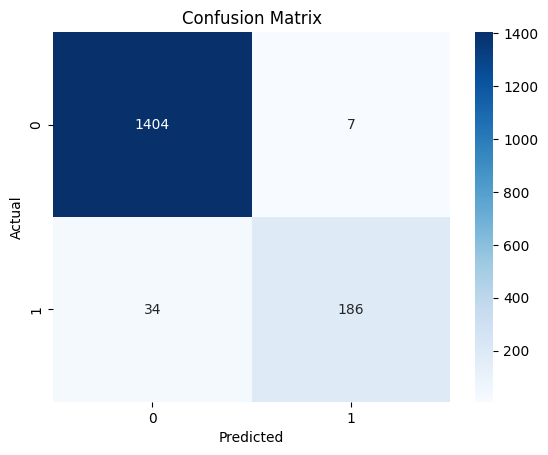

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
len(chat_messages)

5

In [ ]:
# # Function to determine if a chat is illegal based on the 20% threshold
# def check_illegal_chat(chat_messages, model, vectorizer, threshold=0.2):
#     """
#     Parameters:
#         chat_messages: List of messages in the chat.
#         model: Trained logistic regression model.
#         vectorizer: CountVectorizer used for training.
#         threshold: Percentage threshold to classify the chat as illegal.

#     Returns:
#         Boolean indicating if the chat is illegal or not.
#     """
#     chat_vectorized = vectorizer.transform(chat_messages)
#     predictions = model.predict(chat_vectorized)
#     num_suspicious = sum(predictions)
#     percentage_suspicious = num_suspicious / len(chat_messages)
#     print(predictions)
#     return percentage_suspicious > threshold

In [ ]:
chat_messages = [
   "I will sue you, don't make me do these things", "do you have coffee", "Let's have pizza tonight", "O"]

In [ ]:
# is_illegal = check_illegal_chat(chat_messages, model, vectorizer, threshold=0.2)
# if is_illegal:
#     print("The chat is classified as illegal.")
# else:
#     print("The chat is classified as legal.")

[1 0 0 0]
The chat is classified as illegal.


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

In [ ]:
# random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest_model.fit(X_train_vectorized, y_train)
# y_pred_train_rf = random_forest_model.predict(X_train_vectorized)
# y_pred_test_rf = random_forest_model.predict(X_test_vectorized)
# train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
# test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
# print(f"Training Accuracy (Random Forest): {train_accuracy_rf:.2f}")
# print(f"Testing Accuracy (Random Forest): {test_accuracy_rf:.2f}")
# print("\nClassification Report (Random Forest):\n")
# print(classification_report(y_test, y_pred_test_rf))